In [ ]:
import numpy as np
import sys
sys.path.append('../../python')
import plot_info
import matplotlib.pyplot as plt
plot_info.set_notebook_name('InitialData2D.ipynb')
np.random.seed(42)

# Kelvin-Helmholtz 2D

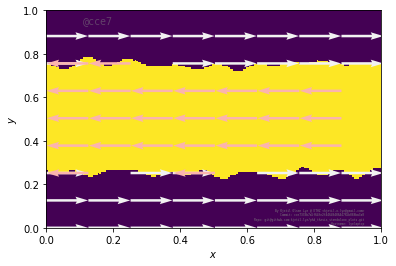

In [7]:
K = 10
N = 128
a1 = np.random.uniform(0,1, K)
a2 = np.random.uniform(0,1, K)
b1 = np.random.uniform(0,1, K)
b2 = np.random.uniform(0,1, K)

perturbation = 0.05
normalization1 = sum(a1)
if abs(normalization1) < 1e-10:
    normalization1 = 1
normalization2 = sum(a2)
if abs(normalization2) < 1e-10:
    normalization2 = 1

x = np.linspace(0, 1, N)
y = np.linspace(0, 1, N)

X, Y =np. meshgrid(x, y)
X = X.T
Y = Y.T

perturbation_upper = 0.75 + perturbation*np.sum([a1[i]*np.cos(2*np.pi*(i+1)*(X+b1[i])) for i in range(len(a1))], 0)/normalization1
perturbation_lower = 0.25 + perturbation*np.sum([a2[i]*np.cos(2*np.pi*(i+1)*(X+b2[i])) for i in range(len(a2))], 0)/normalization2
middle = (Y < perturbation_upper)*(Y > perturbation_lower)

rho = 2.0 * middle + 1.0*(1-middle)
ux = -0.5*middle + 0.5*(1-middle)
uy = np.zeros_like(X)
p = 2.5*np.ones_like(X)


plt.pcolormesh(X, Y, rho)
plt.quiver(X[::16,::16], Y[::16,::16], ux[::16,::16], uy[::16,::16], -rho[::16,::16],
           scale=4, cmap='Pastel1')
plt.xlabel("$x$")
plt.ylabel("$y$")
plot_info.showAndSave(f'kelvinhelmholtz_initial')